# Mixed methods in NGSolve

In [1]:
from ngsolve import *
from ngsolve.webgui import Draw

In [2]:
mesh = Mesh(unit_square.GenerateMesh(maxh=0.3))
Draw(mesh)

WebGuiWidget(value={'gui_settings': {}, 'ngsolve_version': '6.2.2402-37-g45ed24bde', 'mesh_dim': 2, 'order2d':…

BaseWebGuiScene

## Product spaces
In NGSolve spaces maybe tensorized by using the `*` symbol

In [3]:
order = 2
fesh1 = H1(mesh, order = order)
print("h1 dofs: ", fesh1.ndof)
fesl2 = VectorL2(mesh, order = order-1)
print("l2 dofs: ", fesl2.ndof)

fes = fesh1*fesl2
print("total dofs: ", fes.ndof," = ", fesh1.ndof+fesl2.ndof)

h1 dofs:  61
l2 dofs:  144
total dofs:  205  =  205


To assemble bilinear forms we need test and trial functions. From product spaces test and trial functions are returned as tuples:

In [4]:
(p,v), (q,w) = fes.TnT()
bfgrad = BilinearForm(grad(p)*w*dx).Assemble()

The matrix is still an operator on the large space!

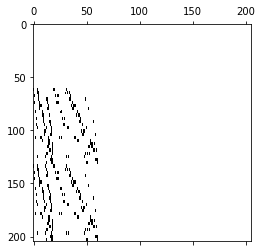

In [5]:
import matplotlib.pyplot as pl
pl.spy(bfgrad.mat.ToDense())

Gridfunctions on product spaces consist of components

In [6]:
gfu = GridFunction(fes)
print("length of whole vector: ",len(gfu.vec))
gfup = gfu.components[0]
print("length of first component: ",len(gfup.vec))
gfuv = gfu.components[1]
print("length of second component: ",len(gfuv.vec))

length of whole vector:  205
length of first component:  61
length of second component:  144


Restriction and embedding operators are available:

In [7]:
emb_p = fes.Embedding(0)
emb_v = fes.Embedding(1)

print(emb_p.shape)
print(emb_v.shape)

res_p = fes.Restriction(0)
res_v = fes.Restriction(1)

print(res_p.shape)
print(res_v.shape)

(205, 61)
(205, 144)
(61, 205)
(144, 205)


## Mixed operators

Alternatively one may define mixed operators. Note that in this case the test and trial functions must be obtained from the base spaces.

In [27]:
fesh1 = H1(mesh,order=order)
feshdiv = HDiv(mesh,order=order)

p_,q_ = fesh1.TnT()
v_,w_ = feshdiv.TnT()

bfgrad = BilinearForm(grad(p_)*w_*dx).Assemble()

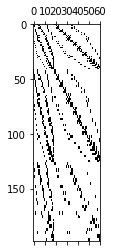

In [28]:
pl.spy(bfgrad.mat.ToDense())

Matrices may also be transposed:

In [29]:
n = specialcf.normal(2)
bfdiv = BilinearForm(-div(v_)*q_*dx+v_.Trace()*n*q_*ds).Assemble()
print((bfdiv.mat.T.ToDense()-bfgrad.mat.ToDense()).Norm())

6.409741197293665e-15
